![ml1](./images/mln1.png)

![ml2](./images/mln2.png)

![ml3](./images/mln3.png)

![ml4](./images/mln4.png)

![ml5](./images/mln5.png)

![ml6](./images/mln6.png)

![ml7](./images/mln7.png)

![ml8](./images/mln8.png)

![ml9](./images/mln9.png)

![ml10](./images/mln10.png)

![ml11](./images/mln11.png)

![ml12](./images/mln12.png)

![ml13](./images/mln13.png)

![ml14](./images/mln14.png)

![ml15](./images/mln15.png)

![ml16](./images/mln16.png)

![ml17](./images/mln17.png)

![ml18](./images/mln18.png)

![ml19](./images/mln19.png)

![ml20](./images/mln20.png)

![ml21](./images/mln21.png)

![ml22](./images/mln22.png)

![ml23](./images/mln23.png)

![ml24](./images/mln24.png)

![ml25](./images/mln25.png)

![ml26](./images/mln26.png)

![ml27](./images/mln27.png)

![ml28](./images/mln28.png)

![ml29](./images/mln29.png)

![ml30](./images/mln30.png)

![ml31](./images/mln31.png)

![ml32](./images/mln32.png)

<div dir="rtl" markdown="1">

ما قصد داریم با استفاده از الگوریتم K-نزدیک‌ترین همسایه (KNN) گونه‌ی گل‌های Iris را بر اساس ویژگی‌های اندازه‌گیری شده (طول و عرض کاسبرگ و گلبرگ) تشخیص دهیم.

مسئله طبقه‌بندی (Classification): هدف، تخصیص یک برچسب (گونه‌ی گل) به هر نمونه است.

مورد استفاده: این روش پایه‌ای در یادگیری ماشین است که مفاهیم فاصله و تصمیم‌گیری ساده را آموزش می‌دهد

Classifying Iris Species

In [35]:
import pandas as pd
import numpy as np
import mglearn # dont forget install mglearn (pip install mglearn)

pandas برای مدیریت داده‌ها به‌صورت جدول

numpy برای محاسبات عددی

mglearn برای ابزارهای کمکی در مصورسازی

Meet the Data

In [36]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

<div dir="rtl" markdown="1">

   load_iris() داده‌ها را به صورت یک دیکشنری (نسخه‌ی Bunch) بازمی‌گرداند که شامل:

   data: آرایه‌ی ویژگی‌ها

   target: آرایه‌ی برچسب‌ها (عددی از 0 تا 2)

   target_names: اسامی گونه‌ها (setosa, versicolor, virginica)

   feature_names: اسامی ویژگی‌ها

   DESCR: توضیحات دقیق مجموعه داده، منبع و واحدهای اندازه‌گیری

In [37]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<div dir="rtl" markdown="1">
کلیدها (keys) نشان می‌دهد چه اطلاعاتی در دسترس است.

In [38]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


<div dir="rtl" markdown="1">
DESCR حاوی جزئیات علمی درباره نحوه‌‌ی جمع‌آوری داده، تعداد نمونه‌ها (۱۵۰ گل)، و توزیع گونه‌ها (۵۰ نمونه از هر گونه).

In [39]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [40]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<div dir="rtl" markdown="1">

feature_names توضیح می‌دهد که هر ستون چه معنایی دارد:

   طول/عرض کاسبرگ (sepal)

   طول/عرض گلبرگ (petal)

In [41]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [42]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<div dir="rtl" markdown="1">
اولین ۵ سطر به ما نشان می‌دهد که هر سطر یک نمونه و هر ستون یک ویژگی است.

In [43]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [44]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


<div dir="rtl" markdown="1">
شکل داده به ما می‌گوید متغیرها و نمونه‌ها چندتا هستند (۱۵۰×۴).

In [45]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<div dir="rtl" markdown="1">
بِین‌کانت (bin count) توزیع نمونه‌ها در سه کلاس را نشان می‌دهد و تضمین تعادل داده است.

Measuring Success: Training and Testing Data

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    test_size=0.25,      
    stratify=iris_dataset['target'],  
    random_state=0
)

<div dir="rtl" markdown="1"> 

   test_size=0.25: می‌گوید ۲۵٪ داده برای ارزیابی مدل کنار گذاشته شود.

   stratify: تضمین می‌کند که درصد هر گونه در مجموعه‌ی آموزش و تست برابر باشد؛ جلوگیری از بایاس در داده‌های نامتعادل.

   random_state: برای تکرارپذیری، تقسیم‌بندی ثابت می‌ماند.

In [48]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [49]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


First Things First: Look at Your Data

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

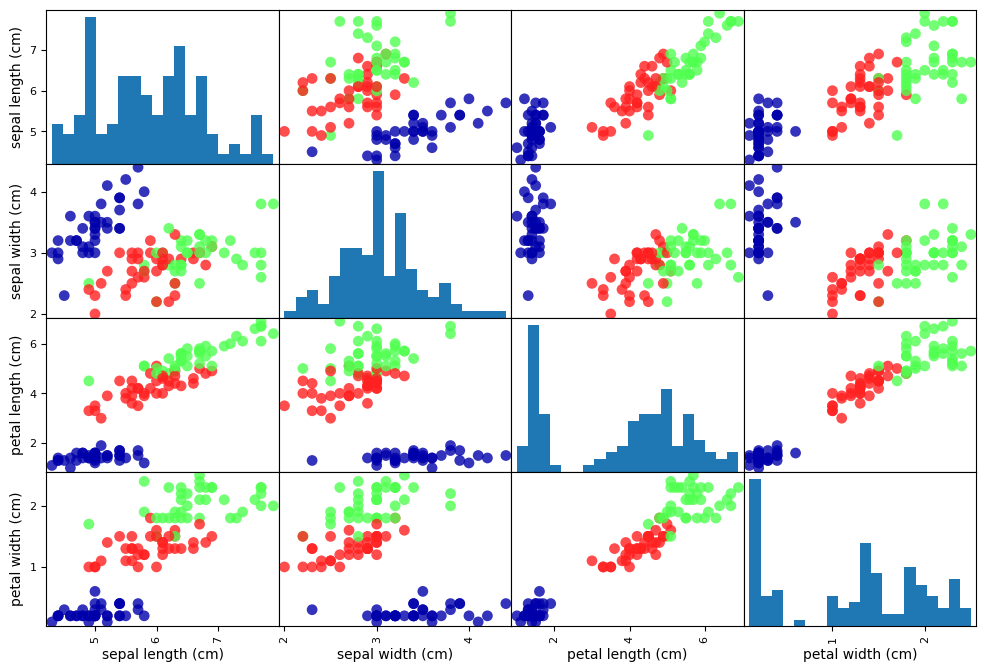

In [50]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(12, 8),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)


<div dir="rtl" markdown="1"> 


  ماتریس پراکنش (Scatter Matrix): برش‌های دوبه‌دو از ویژگی‌ها را نشان می‌دهد و به کمک رنگ می‌توان خوشه‌بندی‌‌های هر کلاس را دید.

   همبستگی غیررسمی: توزیع خطی یا جداشدگی واضح در برخی جفت ویژگی‌ها (مثلاً طول و عرض گلبرگ) به ما می‌گوید کدام ویژگی‌ها برای تفکیک کلاس‌ها مهم‌ترند.

   هیستوگرام روی قطر: توزیع هر ویژگی را به تفکیک کلاس نمایش می‌دهد و کمک می‌کند تفاوت میانگین/واریانس‌ها را مشاهده کنیم

![iris1](./images/Iris1.png)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<div dir="rtl" markdown="1"> 

   اصل کار KNN: برای هر نقطه آزمون، فاصله‌ی آن تا تمام نقاط آموزش (مثلاً فاصله اقلیدسی) محاسبه می‌شود. سپس k ناظر نزدیک‌ترین انتخاب شده و برچسب اکثریت در آن k همسایه، خروجی می‌شود.

   k=1: ساده‌ترین حالت؛ یک همسایه نزدیک‌ترین. مستعد نویز است اما پیاده‌سازی و تفسیر آن مشخص است.

   مزایا و معایب:

   مزیت: هیچ فرضیه‌ی آماری خاصی روی توزیع داده نمی‌گذارد.
    عیب: با افزایش ابعاد (درخت نفرین ابعاد) و داده‌های بزرگ، محاسبات کند می‌شود.

Making Predictions

In [53]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [54]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


<div dir="rtl" markdown="1"> 
    

   فرمت ورودی: باید آرایه‌ی دوبعدی با شکل (n_samples, n_features) باشد.

   تفسیر خروجی:

   prediction یک آرایه از اندیس کلاس‌ها است.

   تبدیل اندیس به نام کلاس (target_names) به درک نتایج کمک می‌کند.

   کاربرد: پس از آموزش مدل، می‌توان برای هر نمونه جدید با اندازه‌گیری ویژگی‌ها، گونه‌ی آن را پیش‌بینی کرد.

Evaluating the Model

In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]



<div dir="rtl" markdown="1"> 

   دقت (Accuracy): نسبت تعداد نمونه‌های درست پیش‌بینی شده به کل نمونه‌ها.

   معیارهای دیگر (ماژول metrics):

   Precision, Recall, F1-score برای هر کلاس

   ماتریس اغتشاش (Confusion Matrix) 

In [22]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [23]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


![ml33](./images/mln33.png)

![ml34](./images/mln34.png)

![ml35](./images/mln35.png)

![ml36](./images/mln36.png)

![ml37](./images/mln37.png)

![ml38](./images/mln38.png)

![ml39](./images/mln39.png)

![ml40](./images/mln40.png)

![ml41](./images/mln41.png)

![ml42](./images/mln42.png)

![ml43](./images/mln43.png)

![ml44](./images/mln44.png)

![ml45](./images/mln45.png)

![ml46](./images/mln46.png)

![ml47](./images/mln47.png)

# Classification with Naive Bayes

<div dir="rtl" markdown="1"> 


این پروژه یک مدل یادگیری ماشین برای پیش‌بینی ابتلا به دیابت بر اساس مجموعه داده‌های پزشکی مربوط به زنان بومی پاما (Pima Indians) است. هدف اصلی این پروژه این است که با استفاده از ویژگی‌هایی مانند سطح گلوکز خون، فشار خون، سن، شاخص توده بدنی (BMI)، تعداد بارداری‌ها و...، پیش‌بینی کنیم که آیا یک فرد مبتلا به دیابت است یا خیر.

در این پروژه مراحل زیر انجام می‌شوند:

   بارگذاری و بررسی داده‌ها
   داده‌ها از یک فایل CSV خوانده شده و ویژگی‌ها مورد بررسی قرار می‌گیرند.

   آماده‌سازی داده‌ها
   ستون خروجی (Outcome) به‌عنوان هدف مدل انتخاب شده و داده‌ها به دو بخش آموزشی و آزمایشی تقسیم می‌شوند.

   آموزش مدل
   از الگوریتم Naive Bayes برای آموزش مدل روی داده‌های آموزشی استفاده می‌شود.

   پیش‌بینی و ارزیابی
   عملکرد مدل با استفاده از ماتریس آشفتگی (Confusion Matrix)، دقت (Accuracy)، فراخوانی (Recall)، دقت پیش‌بینی (Precision) و امتیاز F1 بررسی می‌شود.

In [33]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


| ستون                     | توضیح                                                |
|--------------------------|------------------------------------------------------|
| `Pregnancies`            | تعداد بارداری‌ها                                     |
| `Glucose`                | سطح گلوکز در خون                                     |
| `BloodPressure`          | فشار خون                                             |
| `SkinThickness`          | ضخامت پوست                                           |
| `Insulin`                | سطح انسولین                                          |
| `BMI`                    | شاخص توده بدنی (وزن تقسیم بر مجذور قد)              |
| `DiabetesPedigreeFunction` | سابقه خانوادگی دیابت                             |
| `Outcome`                | نتیجه نهایی (۰ = بدون دیابت، ۱ = مبتلا به دیابت)   |


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes)

<div dir="rtl" markdown="1"> 


در اینجا ما ستون ویژگی‌ها (X) را از برچسب هدف (y) جدا می‌کنیم.

چون هدف ما پیش‌بینی بیماری دیابت است، ستون "Outcome" را جدا کرده و از بقیه ویژگی‌ها برای آموزش مدل استفاده می‌کنیم.

In [9]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


<div dir="rtl" markdown="1"> 


ما مجموعه داده را به دو بخش تقسیم می‌کنیم:

   آموزشی (Train): برای آموزش مدل استفاده می‌شود.

   آزمون (Test): برای ارزیابی مدل استفاده می‌شود.

در اینجا، 600 نمونه برای آموزش و 168 نمونه برای آزمون انتخاب شده‌اند.

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [12]:
nb.fit(X_train,y_train)

GaussianNB()

<div dir="rtl" markdown="1"> 


در این مرحله ما از مدل Naive Bayes (گوسی) برای طبقه‌بندی استفاده می‌کنیم. این مدل فرض می‌کند که ویژگی‌ها مستقل از یکدیگر هستند

و به صورت توزیع نرمال هستند.

In [13]:
nb.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

<div dir="rtl" markdown="1"> 


با استفاده از مدل آموزش‌دیده، ما خروجی 10 نمونه‌ی اول را پیش‌بینی می‌کنیم. خروجی‌ها شامل اعداد ۰ یا ۱ هستند (تشخیص دیابت یا عدم آن).

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[92, 16],
       [24, 36]], dtype=int64)

ماتریس درهم‌ریختگی عملکرد مدل را نشان می‌دهد:

|                  | پیش‌بینی: 0 | پیش‌بینی: 1 |
|------------------|-------------|-------------|
| واقعاً 0         | TP = 92     | FP = 16     |
| واقعاً 1         | FN = 24     | TN = 36     |


In [23]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [29]:
recall_score(y_test,y_pred)

0.6

In [30]:
precision_score(y_test,y_pred)

0.6923076923076923

In [31]:
f1_score(y_test,y_pred)

0.6428571428571429

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       108
           1       0.69      0.60      0.64        60

    accuracy                           0.76       168
   macro avg       0.74      0.73      0.73       168
weighted avg       0.76      0.76      0.76       168



| معیار        | توضیح                                                                 |
|--------------|------------------------------------------------------------------------|
| Precision    | از میان همه پیش‌بینی‌های مثبت، چند درصد درست بودند؟                  |
| Recall (Sensitivity) | از میان همه نمونه‌های واقعاً مثبت، چند درصد را درست تشخیص داد؟ |
| F1-score     | میانگین هارمونیک Precision و Recall، مفید برای داده‌های نامتوازن.     |


![ml64](./images/mln64.png)

![ml65](./images/mln65.png)

![ml66](./images/mln66.png)

![ml67](./images/mln67.png)

![ml68](./images/mln68.png)

![ml69](./images/mln69.png)

## Linear Regression

<div dir="rtl" markdown="1"> 


این پروژه به طور کلی مراحل تحلیل داده‌ها و ساخت مدل رگرسیون خطی چندمتغیره را روی داده‌های بیمه انجام می‌دهد.

ابتدا داده‌ها را بارگذاری و بررسی می‌کند، سپس با نمودارها و آمارهای توصیفی، توزیع و ویژگی‌های داده‌ها را تحلیل می‌کند.

در مرحله بعد، داده‌های متنی (دسته‌ای) را به صورت عددی کدگذاری می‌کند تا برای مدل‌سازی قابل استفاده باشند.

سپس متغیر هدف (هزینه بیمه) را به شکل لگاریتمی تبدیل می‌کند تا توزیع نرمال‌تری داشته باشد.

در نهایت داده‌ها را به مجموعه آموزش و آزمون تقسیم کرده و مدل رگرسیون خطی چندمتغیره را آموزش می‌دهد تا بتواند هزینه بیمه را بر اساس متغیرهای مختلف پیش‌بینی کند.

In [55]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [56]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


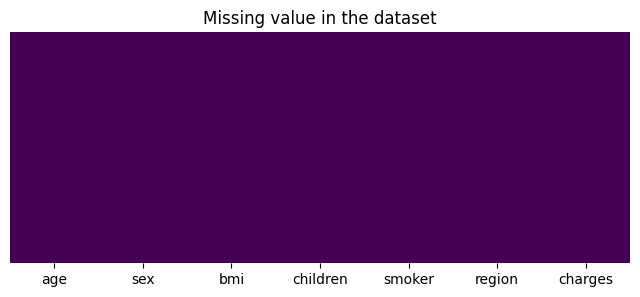

In [58]:
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

<div dir="rtl" markdown="1"> 


 با استفاده از نقشه حرارتی (Heatmap) مقادیر گم‌شده در دیتافریم نمایش داده می‌شوند تا به سرعت بتوان نقصان داده‌ها را تشخیص داد.

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_19404\1119713767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_19404\1119713767.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),b

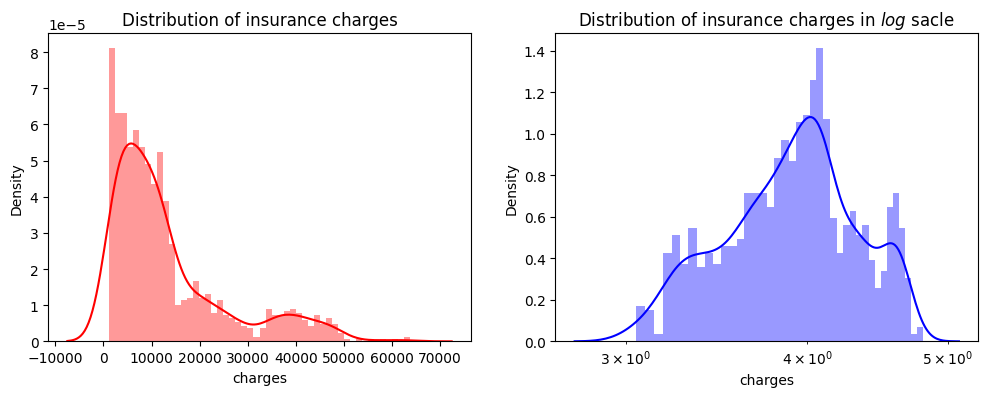

In [59]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

![mln70](./images/mln70.png)

در نمودار اول توزیع اولیه‌ی هزینه‌ها و در نمودار دوم توزیع پس از تبدیل لگاریتم پایه 10 نشان داده می‌شود.

In [60]:
categorical_cols = ['sex', 'children', 'smoker', 'region']
df_enc = pd.get_dummies(df, columns=categorical_cols, prefix='OHE', drop_first=True, dtype='int8')
print('Original shape:', df.shape)
print('Encoded shape :', df_enc.shape)


Original shape: (1338, 7)
Encoded shape : (1338, 13)


<div dir="rtl" markdown="1"> 


برای آماده‌سازی داده‌ها جهت مدل‌سازی، متغیرهای دسته‌ای با روش One-Hot Encoding تبدیل به ویژگی‌های عددی می‌شوند و یک دسته از هر متغیر حذف می‌شود.

In [61]:
import scipy.stats as stats
df_enc['charges'] = np.log(df_enc['charges'])

<div dir="rtl" markdown="1"> 


 به منظور بهبود نرمالیتی، متغیر هدف charges با لگاریتم طبیعی تبدیل می‌شود.

In [62]:
from sklearn.model_selection import train_test_split
X = df_enc.drop('charges', axis=1)
y = df_enc['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

<div dir="rtl" markdown="1"> 


داده‌ها به نسبت 70٪ برای آموزش و 30٪ برای آزمون تقسیم می‌شوند تا عملکرد مدل روی داده‌های دیده‌نشده ارزیابی گردد.

ساخت مدل با معادله‌ی نرمال دستی

In [63]:
X_train0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test0  = np.c_[np.ones((X_test.shape[0], 1)), X_test]
theta = np.linalg.inv(X_train0.T @ X_train0) @ (X_train0.T @ y_train)
param_df = pd.DataFrame({'Feature': ['bias'] + list(X.columns), 'Theta': theta})
param_df.head()

,Feature,Theta
0,bias,7.059171
1,age,0.033134
2,bmi,0.013517
3,OHE_male,-0.067767
4,OHE_1,0.149457


این بخش با افزودن یک ستون بایاس (ستون 1) به ویژگی‌ها، پارامترهای رگرسیون را با حل معادله‌ی نرمال محاسبه می‌کند.

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
sk_thetas = np.concatenate([[lr.intercept_], lr.coef_])
param_df['Sklearn_Theta'] = sk_thetas
param_df

,Feature,Theta,Sklearn_Theta
0,bias,7.059171,7.059171
1,age,0.033134,0.033134
2,bmi,0.013517,0.013517
3,OHE_male,-0.067767,-0.067767
4,OHE_1,0.149457,0.149457
5,OHE_2,0.272919,0.272919
6,OHE_3,0.244095,0.244095
7,OHE_4,0.523339,0.523339
8,OHE_5,0.466030,0.466030
9,OHE_yes,1.550481,1.550481


<div dir="rtl" markdown="1"> 


از کلاس LinearRegression در sklearn برای آموزش مدل استفاده شده و پارامترهای به‌دست‌آمده با روش داخلی کتابخانه استخراج می‌شوند.

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R2:  {r2:.4f}")

MSE: 0.1873
R2:  0.7796


<div dir="rtl" markdown="1"> 


شاخص‌های عیب‌یابی مدل شامل میانگین مربعات خطا (MSE) و ضریب تعیین (R2) محاسبه و چاپ می‌شوند.

![ml56](./images/mln56.png)

![ml57](./images/mln57.png)

![ml58](./images/mln58.png)

# Logistic Regression

<div dir="rtl" markdown="1"> 


این نوت‌بوک یک راهنمای گام‌به‌گام برای پیاده‌سازی یک مدل طبقه‌بندی دودویی با رگرسیون لوگستیک است که هدف آن پیش‌بینی ابتلا به بیماری قلبی است. ساختار کلی نوت‌بوک به این صورت است:

   مقدمه و تعریف مسئله
   معرفی مفهوم یادگیری ماشین نظارت‌شده و جایگاه رگرسیون لوگستیک در مسائل طبقه‌بندی دودویی (بله/خیر).

   بارگذاری و بررسی داده‌ها
   
   تحلیل اکتشافی (EDA)   

   پیش‌پردازش داده‌ها
   جداسازی متغیرهای مستقل (ویژگی‌ها) و هدف، حذف یا تبدیل داده‌های ناقص و تقسیم داده به مجموعه‌های آموزش و تست.

   ساخت و آموزش مدل
   تعریف مدل LogisticRegression، آموزش آن روی داده‌های آموزشی و ذخیره پارامترهای به‌دست‌آمده.

   پیش‌بینی و ارزیابی

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv("heart-disease-UCI.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


| Feature  | Description                                           | Feature  | Description                                              |
|----------|-------------------------------------------------------|----------|----------------------------------------------------------|
| age      | سن بیمار                                              | thalach  | حداکثر ضربان قلب                                         |
| sex      | جنسیت (1=مرد، 0=زن)                                   | exang    | درد قفسه سینه ناشی از ورزش (1=بله، 0=خیر)               |
| cp       | نوع درد قفسه سینه (۰–۳)                              | oldpeak  | میزان افت ST ناشی از ورزش نسبت به استراحت                |
| trestbps | فشار خون در حالت استراحت                              | slope    | شیب ST در بیشترین ورزش                                |
| chol     | کلسترول سرم (میلی‌گرم در دسی‌لیتر)                    | ca       | تعداد رگ‌های بزرگ رنگ شده (۰–۳)                         |
| fbs      | قند خون ناشتایی > 120 mg/dl (1=بله، 0=خیر)             | thal     | تالاسمی (1=طبیعی، 2=defect ثابت، 3=defect برگشت‌پذیر)   |
| restecg  | نتایج ECG استراحت (0–۲)                                | target   | برچسب هدف (1=بیماری قلبی دارد، 0=ندارد)                |


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div dir="rtl" markdown="1"> 

نقشه همبستگی (Heatmap) نشان می‌دهد کدام ویژگی‌ها با هم رابطه‌ دارند.

<Axes: >

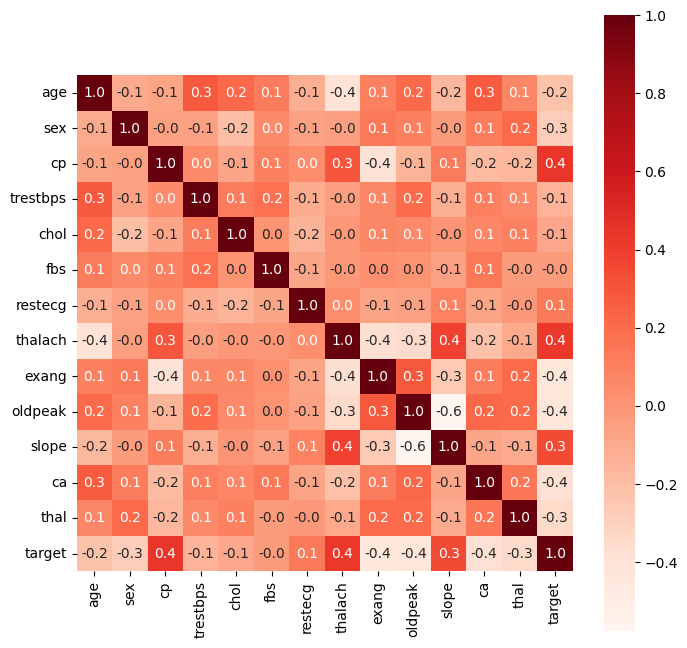

In [4]:
corr = heart_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<Axes: xlabel='target', ylabel='count'>

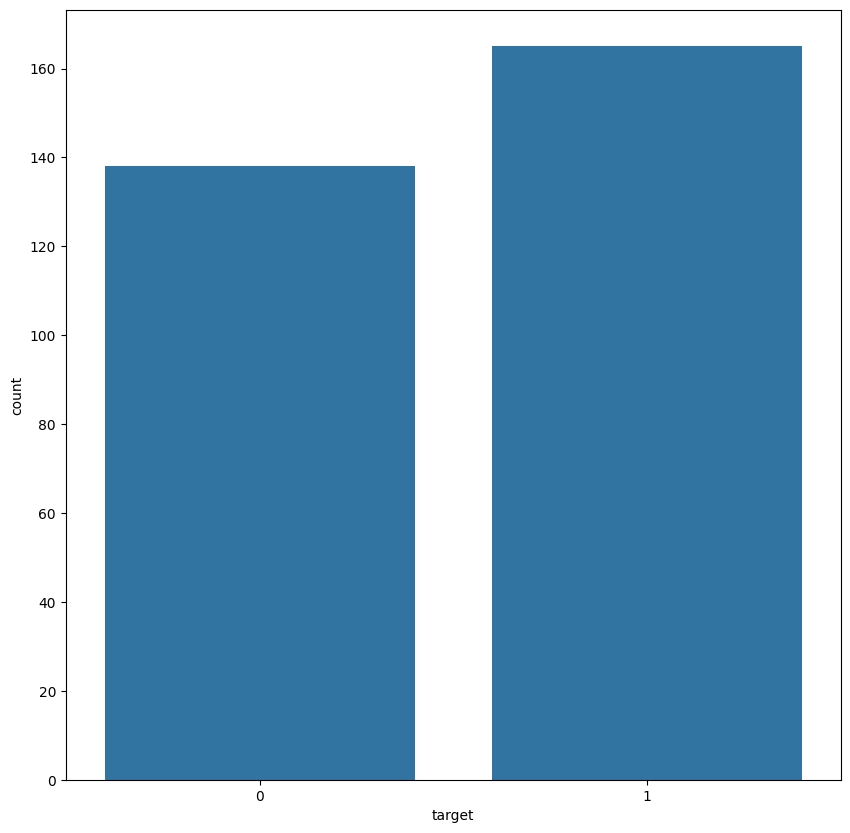

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x="target", data=heart_data)
#این نمودار نشان می‌دهد چند نمونه در هر دسته وجود دارد.
#تعادل (یا عدم آن) در تعداد نمونه‌ها بر عملکرد مدل تأثیر می‌گذارد

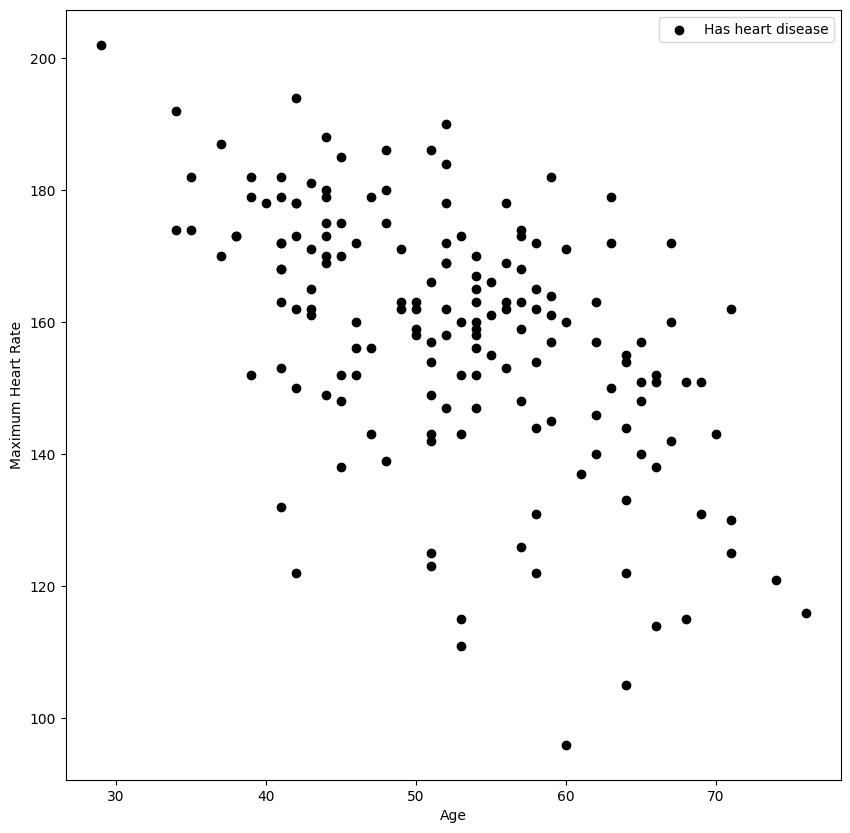

In [11]:
# Heart disease across ages
plt.figure(figsize=(10,10))
plt.scatter(x=heart_data.age[heart_data.target == 1] , y=heart_data.thalach[heart_data.target == 1],c='black')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Has heart disease'])

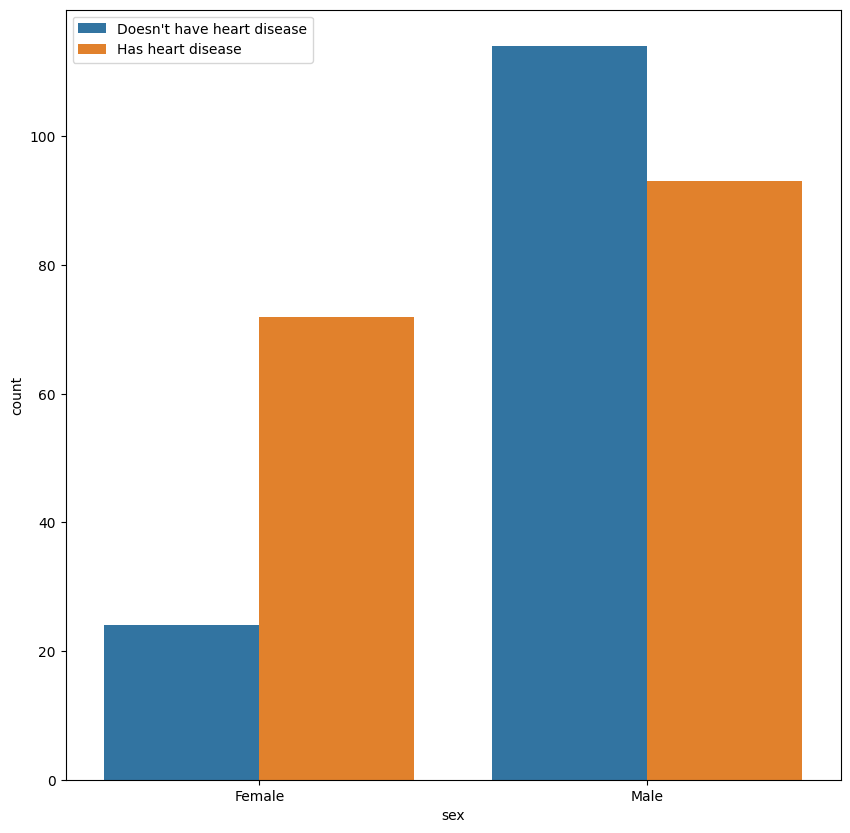

In [12]:
# Heart disease across sexes
plt.figure(figsize=(10,10))
sns.countplot(data=heart_data,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Doesn't have heart disease", 'Has heart disease'])

In [14]:
# We need to split the data
X = heart_data.drop(['target'],axis=1)
y = heart_data['target'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) 

In [16]:
print(X.shape,X_train.shape)

(303, 13) (242, 13)


In [17]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [20]:
test_pred = model.predict(X_test)
test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [21]:
# Accuracy Score
Test_score = accuracy_score(test_pred,y_test) 
print("Accuracy Score:",Test_score)

Accuracy Score: 0.9016393442622951


![ml59](./images/mln59.png)

![ml60](./images/mln60.png)

![ml61](./images/mln61.png)

![ml62](./images/mln62.png)

![ml63](./images/mln63.png)

# Decision Tree

1. Import Required Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2.Loading the data Set

In [25]:
dataset = pd.read_csv("DecisionTrees_titanic.csv")
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


| Feature    | Description                                                            |
|------------|------------------------------------------------------------------------|
| Survived   | بقا (1 = زنده ماند، 0 = غرق شد)                                        |
| Pclass     | طبقه بلیت (1 = درجه یک، 2 = درجه دو، 3 = درجه سه)                     |
| Sex        | جنسیت (0 = زن، 1 = مرد)                                               |
| Age        | سن مسافر (سال)                                                        |
| SibSp      | تعداد خواهر/برادر یا همسر همراه                                      |
| Parch      | تعداد والد/فرزند همراه                                               |
| Fare       | هزینه بلیت (به پوند)                                                   |
| Embarked   | بندر سوار شدن (0 = Cherbourg، 1 = Queenstown، 2 = Southampton)        |


3. Data Splitting and Model Training

In [26]:
y = dataset.loc[:,"Survived"]

X = dataset.drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

4. Decision Tree Model Training and Prediction

In [27]:
decisiontree = DecisionTreeClassifier()

decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
decisiontree_pred = decisiontree.predict(X_test)

5. Random Forest Model Training and Prediction

In [29]:
randomforest = RandomForestClassifier()

randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
randomforest_pred = randomforest.predict(X_test)


6. Classification Reports for Model Predictions

In [31]:
print(classification_report(y_test, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.82      0.85      0.84        33

    accuracy                           0.80        55
   macro avg       0.79      0.79      0.79        55
weighted avg       0.80      0.80      0.80        55



In [32]:
print(classification_report(y_test, randomforest_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        22
           1       0.75      0.82      0.78        33

    accuracy                           0.73        55
   macro avg       0.72      0.70      0.71        55
weighted avg       0.72      0.73      0.72        55



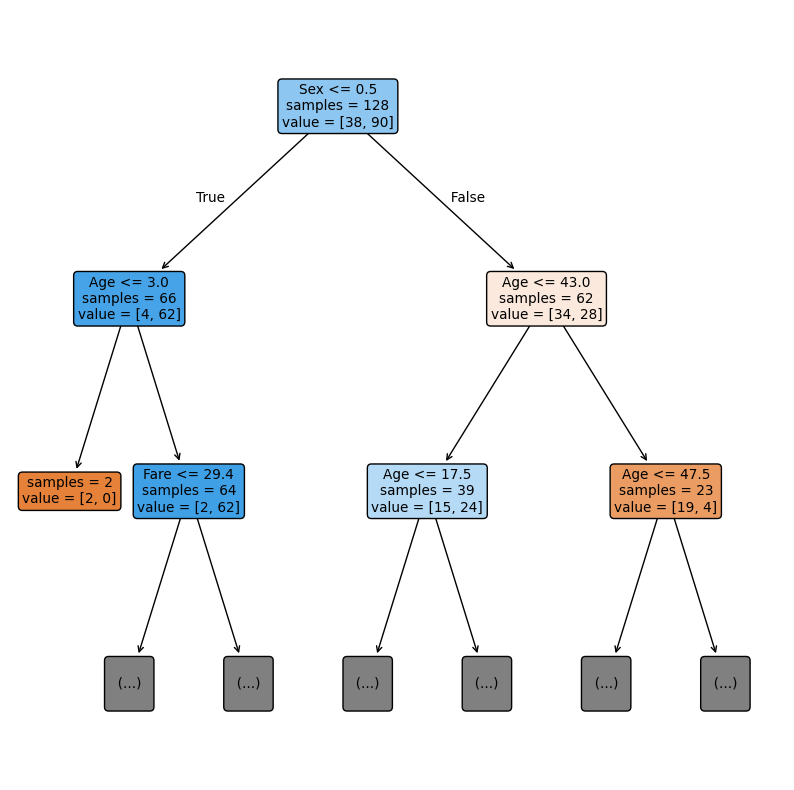

In [33]:
fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,
          feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show(block=True)

![mln71](./images/mln71.png)

![mln114](./images/mln114.png)

![mln115](./images/mln115.png)

![mln116](./images/mln116.png)

![mln117](./images/mln117.png)

![mln118](./images/mln118.png)

## Support Vector Machine

In [3]:
import os
import pandas as pd   # برای خواندن CSV
import numpy as np    # برای محاسبات عددی
import matplotlib.pyplot as plt  # برای نمودارها
import seaborn as sns            # برای نمودارهای زیبای آماری

# از ماژول‌های sklearn برای مدل‌سازی و پیش‌پردازش
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, SVR, LinearSVC
from matplotlib.colors import ListedColormap

In [27]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# چک کردن مقدار گمشده
print('Missing values:', train_df.isnull().sum().max())

# نمایش ستون‌ها و نوع داده‌ها
print(train_df.columns)
print(train_df.dtypes)

<div dir="rtl" markdown="1"> 

   isnull().sum() تعداد مقادیر گمشده را نشان می‌دهد.

   با columns و dtypes متوجه می‌شویم چه ویژگی‌هایی داریم و نوعشان چیست.

In [6]:
# توزیع کلاس‌ها
print(train_df['price_range'].value_counts())

# آمار توصیفی
print(train_df['price_range'].describe())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64
count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


<div dir="rtl" markdown="1"> 

این ستون عددی بین 0 تا 3 است که نشان‌دهنده چهار گروه قیمت موبایل است.

با value_counts متوجه می‌شویم داده‌ها نسبتاً متوازن هستند.

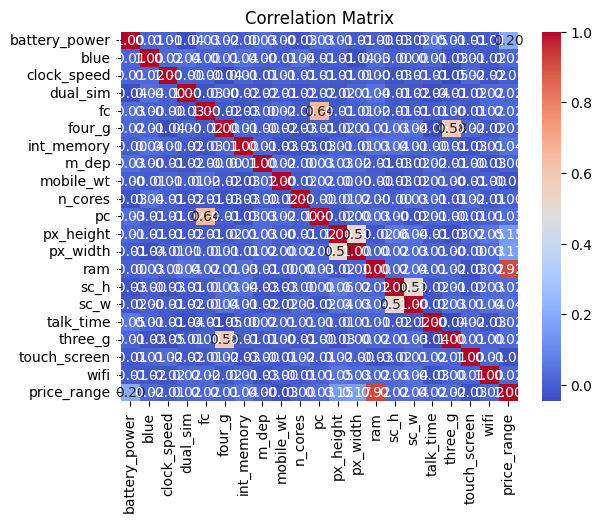

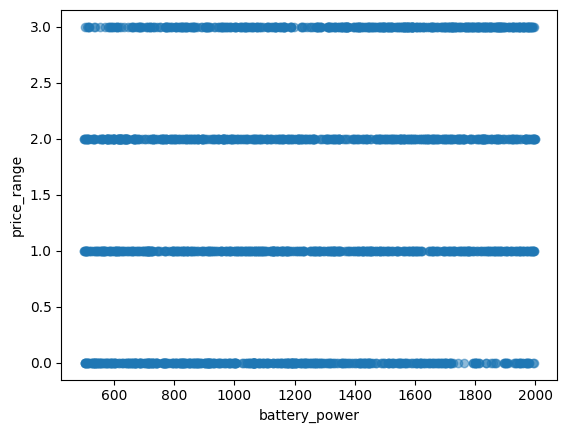

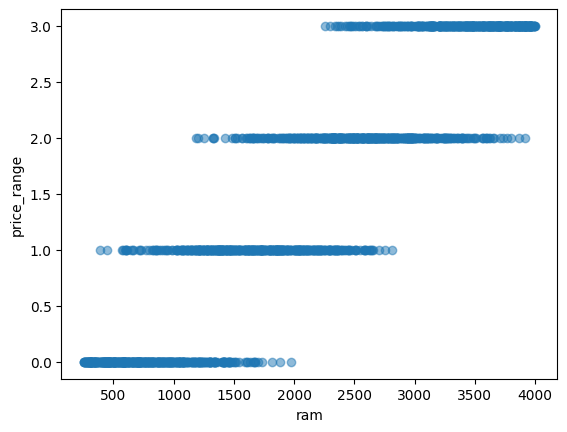

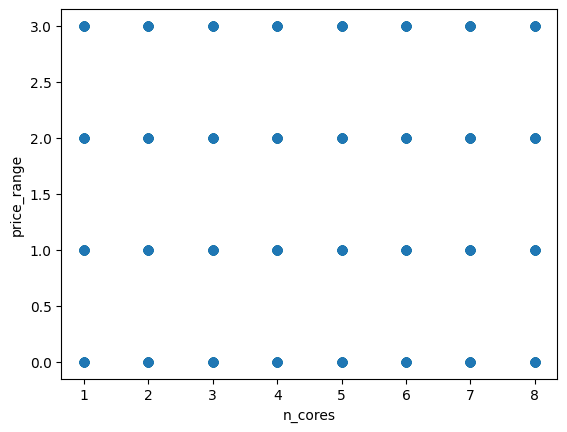

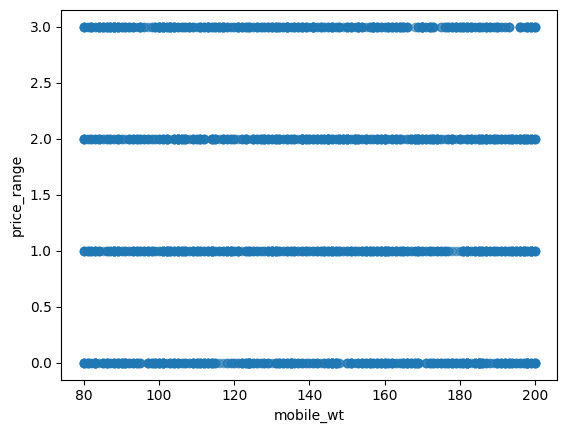

In [8]:
# ماتریس همبستگی
corr = train_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# نمودار پراکنش چند ویژگی نسبت به price_range
features = ['battery_power', 'ram', 'n_cores', 'mobile_wt']
for feat in features:
    plt.scatter(train_df[feat], train_df['price_range'], alpha=0.5)
    plt.xlabel(feat)
    plt.ylabel('price_range')
    plt.show()

In [10]:
# جدا کردن ویژگی‌ها و برچسب‌ها
y = train_df['price_range'].values
X = train_df.drop('price_range', axis=1).values

# تقسیم 80% آموزش و 20% آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42,
    stratify=y)

<div dir="rtl" markdown="1"> 

stratify=y تضمین می‌کند توزیع کلاس‌ها در هر دو مجموعه ثابت بماند.

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

<div dir="rtl" markdown="1"> 


SVM حساس به مقیاس ویژگی‌ها است؛ بنابراین همه ویژگی‌ها را بین 0 و 1 می‌بریم.

In [12]:
for C_val in [1, 3, 5, 10, 40, 60, 80, 100]:
    clf = SVC(kernel='linear', C=C_val)
    clf.fit(X_train, y_train)
    print(f'C={C_val}: Train={clf.score(X_train, y_train):.2f}, Test={clf.score(X_test, y_test):.2f}')

C=1: Train=0.96, Test=0.95
C=3: Train=0.97, Test=0.96
C=5: Train=0.97, Test=0.96
C=10: Train=0.97, Test=0.96
C=40: Train=0.98, Test=0.97
C=60: Train=0.98, Test=0.96
C=80: Train=0.98, Test=0.97
C=100: Train=0.98, Test=0.97


<div dir="rtl" markdown="1"> 



C ضریب منظم‌سازی است؛ مقادیر کوچک باعث مرز ساده‌تر و بزرگ‌تر، مرز پیچیده‌تر می‌شود.

In [13]:
# انتخاب بهترین مدل از قبل (مثلاً C=20)
model = SVC(kernel='linear', C=20)
scores = cross_val_score(model, X_train, y_train, cv=5)
strat_scores = cross_val_score(
    model, X_train, y_train,
    cv=StratifiedKFold(5, shuffle=True, random_state=10)
)
print('CV scores:', scores)
print('Average CV:', scores.mean())
print('Stratified CV scores:', strat_scores)
print('Average Stratified CV:', strat_scores.mean())

CV scores: [0.95625  0.9375   0.9625   0.95625  0.959375]
Average CV: 0.954375
Stratified CV scores: [0.953125 0.971875 0.975    0.95625  0.959375]
Average Stratified CV: 0.963125


<div dir="rtl" markdown="1"> 


کراس‌ولیدیشن دقیق‌تر مدل را ارزیابی می‌کند و از overfitting جلوگیری می‌کند.

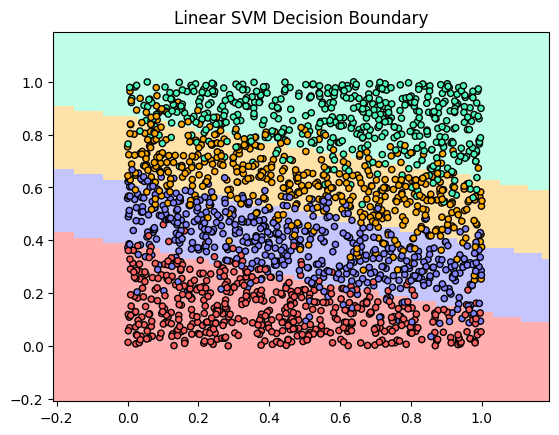

In [15]:
# استفاده از دو ویژگی برای نمایش در دو بعد
X2 = train_df[['battery_power', 'ram']].values
y2 = y.copy()
X2 = scaler.fit_transform(X2)

# تعریف مش و رنگ‌ها
cm_dark = ListedColormap(['#ff6060','#8282ff','#ffaa00','#4df9b9'])
cm_bright = ListedColormap(['#ffafaf','#c6c6ff','#ffe2a8','#bfffe7'])

clf2d = SVC(kernel='linear', C=1)
clf2d.fit(X2, y2)

# ایجاد شبکه مش برای تصویر مرز
h = .02
x_min, x_max = X2[:,0].min()-0.2, X2[:,0].max()+0.2
y_min, y_max = X2[:,1].min()-0.2, X2[:,1].max()+0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=cm_dark, edgecolor='k', s=20)
plt.title('Linear SVM Decision Boundary')
plt.show()

![ml119](./images/mln119.png)

<div dir="rtl" markdown="1"> 


با انتخاب دو ویژگی می‌توان مرز تصمیم‌گیری را در صفحه دو بعدی نمایش داد.

In [17]:
for C_val in [1, 3, 5, 10, 40, 60, 80, 100]:
    ls = LinearSVC(C=C_val, max_iter=10000)
    ls.fit(X_train, y_train)
    print(f'C={C_val}: Train={ls.score(X_train, y_train):.2f}, Test={ls.score(X_test, y_test):.2f}')

C=1: Train=0.85, Test=0.81
C=3: Train=0.87, Test=0.81
C=5: Train=0.87, Test=0.82
C=10: Train=0.88, Test=0.82
C=40: Train=0.89, Test=0.83
C=60: Train=0.89, Test=0.83
C=80: Train=0.89, Test=0.83
C=100: Train=0.89, Test=0.83


<div dir="rtl" markdown="1"> 



LinearSVC نسخه سریع‌تر SVM خطی است.

In [18]:
svr = SVR(kernel='linear', C=1, epsilon=0.01)
svr.fit(X_train, y_train)
print(f'SVR linear accuracy: {svr.score(X_train, y_train):.2f}')

SVR linear accuracy: 0.92


<div dir="rtl" markdown="1"> 


رگرسیون SVM سعی می‌کند خطی پیدا کند که خطاها را در محدوده ε حفظ کند.

In [20]:
for C_val in [1, 5, 10, 25, 50, 100]:
    clf_rbf = SVC(kernel='rbf', C=C_val)
    clf_rbf.fit(X_train, y_train)
    print(f'RBF C={C_val}: Train={clf_rbf.score(X_train, y_train):.2f}, Test={clf_rbf.score(X_test, y_test):.2f}')

RBF C=1: Train=0.97, Test=0.86
RBF C=5: Train=1.00, Test=0.88
RBF C=10: Train=1.00, Test=0.88
RBF C=25: Train=1.00, Test=0.88
RBF C=50: Train=1.00, Test=0.88
RBF C=100: Train=1.00, Test=0.88


<div dir="rtl" markdown="1"> 


هسته RBF برای داده‌های غیرخطی مناسب است.

In [23]:
param_grid = {'C':[1,5,7,10,15,25,50], 'gamma':[0.1,0.5,1]}
gs = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
gs.fit(X_train, y_train)
print('Best params:', gs.best_params_)
print('Best CV score:', gs.best_score_)

Best params: {'C': 15, 'gamma': 0.1}
Best CV score: 0.8925000000000001


<div dir="rtl" markdown="1"> 


GridSearchCV بهترین ترکیب پارامترها را با کراس‌ولیدیشن پیدا می‌کند.

In [24]:
svr_poly = SVR(kernel='poly', degree=2, C=100, epsilon=0.01)
svr_poly.fit(X_train, y_train)
print(f'SVR poly accuracy: {svr_poly.score(X_train, y_train):.2f}')

SVR poly accuracy: 0.90


<div dir="rtl" markdown="1"> 


هسته چندجمله‌ای (poly) برای رگرسیون غیرخطی استفاده می‌شود.

![ml120](./images/mln120.png)

![ml121](./images/mln121.png)

![ml122](./images/mln122.png)

![ml123](./images/mln123.png)

![ml124](./images/mln124.png)

## XGBOOST

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve,train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
from sklearn.model_selection import learning_curve
import xgboost as xgb

In [3]:
df=pd.read_csv("ionosphere.csv")
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
# convert from string to numeric

df["class"]=df["class"].map({"g":1,"b":0})

y = df["class"] # dependent(target) variable
X = df.drop("class",axis=1)# independent variables

In [7]:
#splitting with  Holdout method for eval_set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=45,
                                                    stratify=y)
# stratify parameter for the target variable to be evenly distributed in the train and test set

In [10]:
eval_set = [(X_test, y_test)]
xgb_cls= xgb.XGBClassifier(objective="binary:logistic",
                           eval_metric="logloss",n_estimators=100)

xgb_cls.fit(X_train, y_train, 
            eval_set=[(X_train, y_train),(X_test, y_test)], 
            verbose=0) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

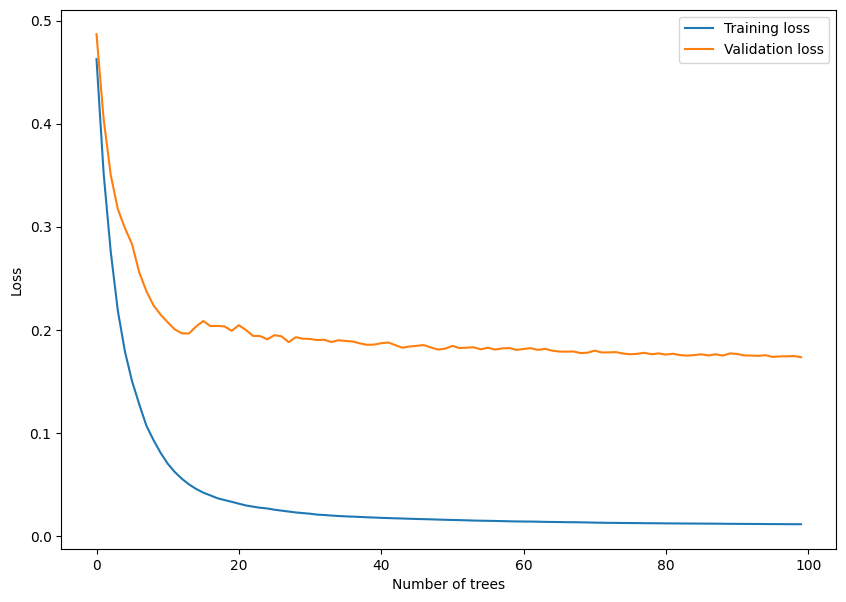

In [11]:
# loss curve of xgboost
results = xgb_cls.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

In [13]:
cv_results = cross_validate(xgb_cls, X, y, cv=10, scoring=["f1"],
                            return_train_score=True)
print(cv_results['test_f1'].mean())
print(cv_results['train_f1'].mean())

0.944695883679629
1.0


In [14]:
xgboost_params = {"learning_rate": [0.1, 0.05],
                  "max_depth": [1,2,3],
                  "n_estimators": [20,30,50,70,90], 
                  "reg_lambda" :[2,3],
                  "gamma":[2,3],
                  "subsample":[0.5],
                    "min_child_weight": [3,4],
                    "colsample_bytree":[0.4],
                  "colsample_bylevel":[0.4],
                  "colsample_bynode":[0.4]
                 }

fit_params={"eval_set" : [[X_test, y_test]]}

In [15]:
xgboost_best_grid = GridSearchCV(xgb_cls, xgboost_params,
                                 cv=7, n_jobs=-1,
                                 return_train_score=True).fit(X, y,**fit_params,verbose=0)

In [16]:
xgboost_best_grid.best_params_

{'colsample_bylevel': 0.4,
 'colsample_bynode': 0.4,
 'colsample_bytree': 0.4,
 'gamma': 2,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 70,
 'reg_lambda': 3,
 'subsample': 0.5}

In [17]:
xgboost_best_grid.best_score_

0.9258823529411764

In [18]:
# create final xgboost model
xgbm_final = xgb_cls.set_params(**xgboost_best_grid.best_params_, 
                                random_state=17, ).fit(X, y)


cv_results = cross_validate(xgbm_final, X, y, cv=10,
                            scoring=["f1"],return_train_score=True)

print(cv_results['train_f1'].mean())
print(cv_results['test_f1'].mean())

0.9621095016690997
0.9434054667195279


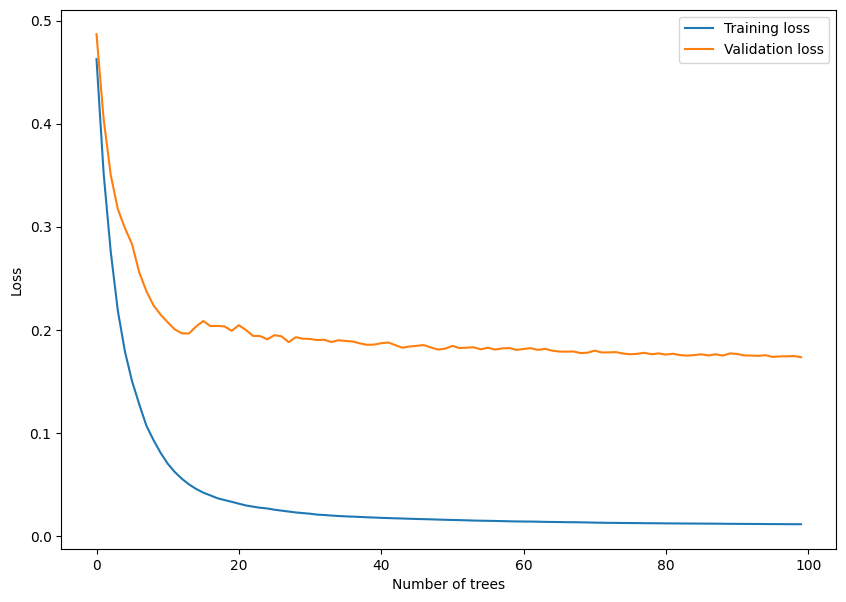

In [19]:
results = xgbm_final.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

In [21]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

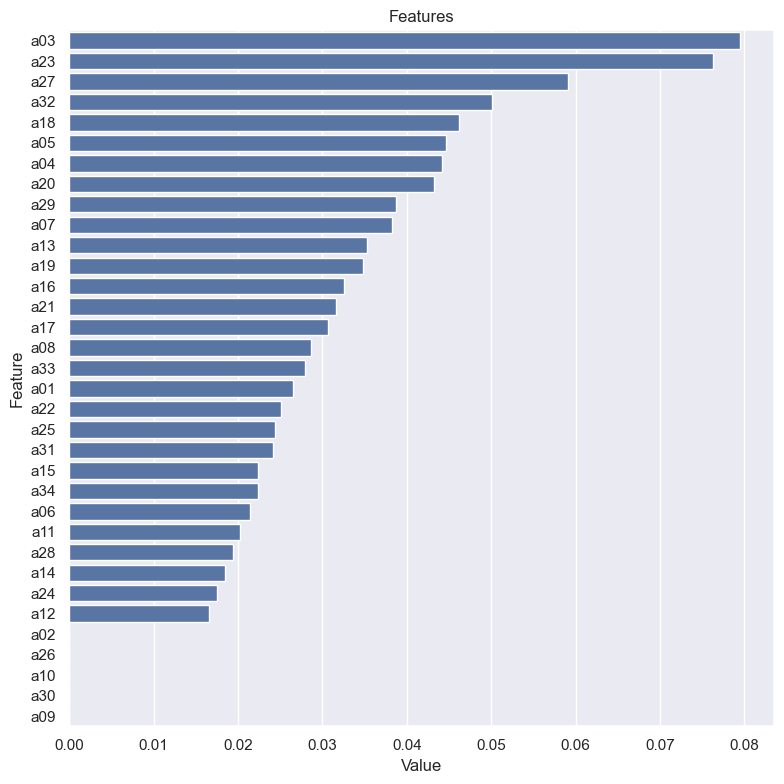

In [22]:
plot_importance(xgb_cls, X)
# When the feature importance graph is observed, 
# it is seen that the variables other than a02 and a01 are important for the xgboost model.

![ml125](./images/mln125.png)

![ml126](./images/mln126.png)

![ml127](./images/mln127.png)

![ml128](./images/mln128.png)

![ml129](./images/mln129.png)

![ml130](./images/mln130.png)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier , ExtraTreesClassifier, VotingClassifier ,StackingClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [25]:
df=pd.read_csv('Admission Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
df.shape

(400, 9)

In [27]:
x = df.iloc[: , 0:2].values
y = df.iloc[:,2].values

In [28]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [29]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [30]:
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.0875

In [31]:
## Create many mode types 
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

In [32]:


## create a voting classifier 
model_list = [('lr',lr),('dt',dt),('svm',svm)]

v = VotingClassifier(
    estimators = model_list , 
    n_jobs=-1
)



In [33]:
# train the voting classifier 
v.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())],
                 n_jobs=-1)

In [34]:
# create the bagging classifier 
bc = BaggingClassifier(
    estimator= dt , 
    n_estimators=9
)

# fit the model on the data 
bc.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=9)

In [35]:
# make predictions 
y_pred = bc.predict(X_test)
accuracy_score(y_test,y_pred)

0.1625

In [36]:
# create the model  with 10 sub models 
adm = AdaBoostClassifier(n_estimators=10)

# fit the model 
adm.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [37]:
# make prediction 
y_pred = adm.predict(X_test)

# test the accuracy 
accuracy_score(y_test,y_pred)

0.025

In [38]:
### Building Base models 
base_classifiers = [
    ('lr' , LogisticRegression()) , 
    ('knn',KNeighborsClassifier()),
    ('dt' , DecisionTreeClassifier()),
    ('svm' , SVC())
]

## Build the stacking classifier 
sc = StackingClassifier(
    estimators=base_classifiers , 
    final_estimator= SVC()  , 
    cv=3
)

![ml131](./images/mln131.png)

![ml132](./images/mln132.png)

![ml133](./images/mln133.png)

![ml134](./images/mln134.png)

![ml135](./images/mln135.png)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
iris = datasets.load_iris()
X = iris.data          # ویژگی‌ها: شکل (150, 4)
y = iris.target        # برچسب‌ها: 0=setosa,1=versicolor,2=virginica
labels = iris.target_names

<div dir="rtl" markdown="1">


 دیتاستIris شامل 150 نمونه با 4 ویژگی (طول و عرض کاسبرگ و گلبرگ)
و 3 کلاس متفاوت است.

In [19]:
# تبدیل به DataFrame برای مشاهده اولیه
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [20]:
#   تقسیم داده به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
#  مدلسازی بدون LDA (روی داده‌های اولیه)
clf_raw = LogisticRegression(max_iter=200)
clf_raw.fit(X_train, y_train)
y_pred_raw = clf_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

<div dir="rtl" markdown="1">


مدل رگرسیون لجستیک روی 4 ویژگی اصلی آموزش داده می‌شو

In [22]:
# 4. اعمال LDA و کاهش به دو بعد
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

<div dir="rtl" markdown="1">


 LDA جهت‌هایی را پیدا می‌کند که بیشترین جدایش کلاس‌ها را دارند
و داده را به فضای 2 بعدی منتقل می‌کند.

In [23]:
# 5. مدلسازی روی فضای LDA
clf_lda = LogisticRegression(max_iter=200)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"Accuracy without LDA: {acc_raw:.2f}")
print(f"Accuracy with LDA:    {acc_lda:.2f}")

Accuracy without LDA: 0.93
Accuracy with LDA:    0.98


<div dir="rtl" markdown="1">


همان مدل لجستیک را روی داده‌های کاهش‌ یافته آموزش می‌دهیم

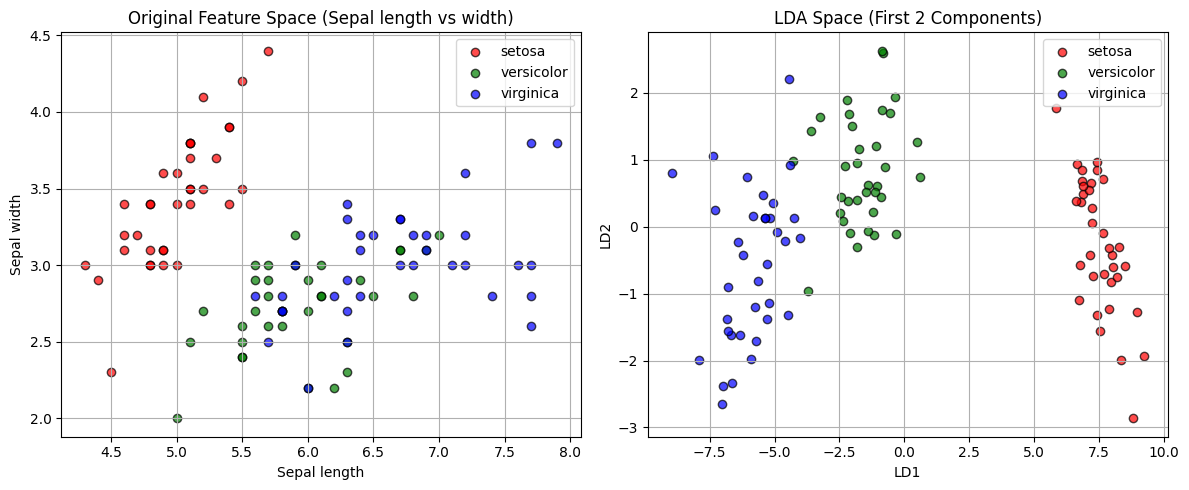

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 6.1 فضای اولیه: رسم دو ویژگی اول
for class_idx, color in enumerate(['r', 'g', 'b']):
    axes[0].scatter(
        X_train[y_train==class_idx, 0],  # Sepal length
        X_train[y_train==class_idx, 1],  # Sepal width
        label=labels[class_idx],
        alpha=0.7,
        edgecolors='k',
        color=color
    )
axes[0].set_title('Original Feature Space (Sepal length vs width)')
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].legend()
axes[0].grid(True)

# 6.2 فضای LDA: دو مؤلفه اول
for class_idx, color in enumerate(['r', 'g', 'b']):
    axes[1].scatter(
        X_train_lda[y_train==class_idx, 0],  # LD1
        X_train_lda[y_train==class_idx, 1],  # LD2
        label=labels[class_idx],
        alpha=0.7,
        edgecolors='k',
        color=color
    )
axes[1].set_title('LDA Space (First 2 Components)')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

![ml142](./images/mln142.png)

<div dir="rtl" markdown="1">


در نمودار سمت چپ فضای اولیه (دو ویژگی اول) و
 در نمودار سمت راست فضای 2 بعدی LDA رسم شده است.

![ml136](./images/mln136.png)

![ml137](./images/mln137.png)

![ml138](./images/mln138.png)

![ml139](./images/mln139.png)

![ml140](./images/mln140.png)

## Importing the libraries

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [36]:
df = pd.read_csv('iris.csv')
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

<img src="https://miro.medium.com/max/875/1*Qxyo-uDrmsUzdxIe7Nnsmg.png" width=80% />

## Applying PCA

In [39]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [41]:
maindf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])

In [42]:
maindf

,principal component 1,principal component 2
0,-2.501021,0.451868
1,-2.279945,-0.696698
2,-2.559435,-0.383488
3,-2.476060,-0.636243
4,-2.579407,0.611050
...,...,...
145,1.953963,0.391855
146,1.982991,-0.866112
147,1.854045,0.290264
148,1.478182,0.982267


In [43]:
pca.components_

array([[ 0.55318314,  0.51774664, -0.28847469,  0.58541369],
       [ 0.00902118,  0.42093567,  0.90471285,  0.06501105]])

<img src="https://miro.medium.com/max/875/1*7jUCr36YguAMKNHTN4Gt8A.png" width=80% />

In [44]:
pca.explained_variance_

array([2.83122907, 0.92107083])

In [45]:
finaldf = pd.concat([maindf, df[['Species']]], axis = 1)
finaldf

,principal component 1,principal component 2,Species
0,-2.501021,0.451868,Iris-setosa
1,-2.279945,-0.696698,Iris-setosa
2,-2.559435,-0.383488,Iris-setosa
3,-2.476060,-0.636243,Iris-setosa
4,-2.579407,0.611050,Iris-setosa
...,...,...,...
145,1.953963,0.391855,Iris-virginica
146,1.982991,-0.866112,Iris-virginica
147,1.854045,0.290264,Iris-virginica
148,1.478182,0.982267,Iris-virginica


## Visualising the results

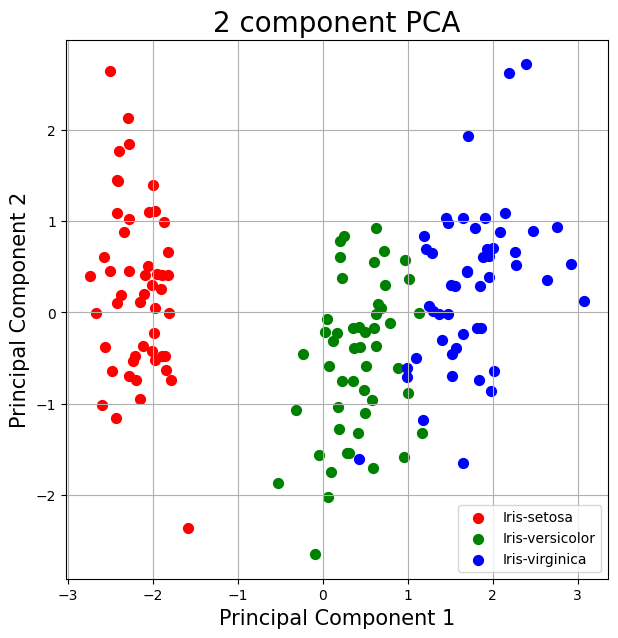

In [50]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

![ml143](./images/mln143.png)

![ml144](./images/mln144.png)

![ml145](./images/mln145.png)

![ml146](./images/mln146.png)

![ml147](./images/mln147.png)

![ml148](./images/mln148.png)

## Importing the libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Importing the dataset

In [51]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Using K-means in Action

In [53]:
from sklearn.cluster import KMeans

* Within Cluster Sum of Squares (WCSS):

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [55]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211119,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.57922077922,
 26686.837785187785,
 24766.47160979344,
 23103.12208598392]

## How to use K in K-means? (Elbow Curve)

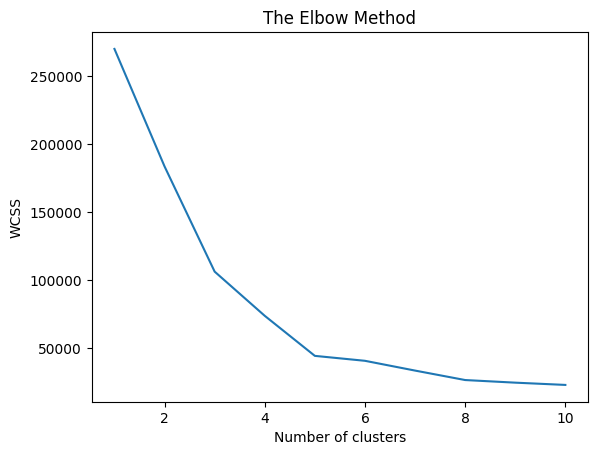

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

In [58]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

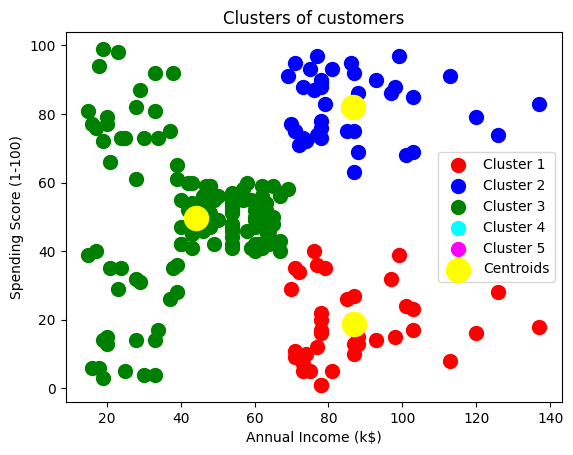

In [59]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

![ml149](./images/mln149.png)

![ml150](./images/mln150.png)

![ml151](./images/mln151.png)

![ml152](./images/mln152.png)

![ml153](./images/mln153.png)

![ml154](./images/mln154.png)

![ml155](./images/mln155.png)

![ml156](./images/mln156.png)

![ml157](./images/mln157.png)

![ml158](./images/mln158.png)

![ml159](./images/mln159.png)

![ml160](./images/mln160.png)

## Importing the libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Importing the dataset

In [3]:
weather_df = pd.read_csv('weather-stations.csv')
print ("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(3) 

Shape of the DataFrame:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

| Column  | Description                                                                 |
|---------|-----------------------------------------------------------------------------|
| P       | Total Precipitation (mm)                                                    |
| DwP     | Days Without Valid Precipitation                                            |
| P%N     | Percent of Normal Precipitation                                             |
| Pd      | Number of Days with Precipitation ≥ 1 mm                                    |
| BS      | Bright Sunshine Days                                                        |
| DwBS    | Days Without Valid Bright Sunshine                                          |
| BS%     | Percent of Normal Bright Sunshine                                           |
| HDD     | Degree Days Below 18°C                                                      |
| CDD     | Degree Days Above 18°C                                                      |
| Stn_No  | Station Number (3 digits = basin, 4 digits = alphabetical sorting)          |

| Column    | Description                                                                 |
|-----------|-----------------------------------------------------------------------------|
| Stn_Name  | Station Name                                                                |
| Prov      | Province                                                                    |
| Tm        | Mean Temperature (°C)                                                       |
| Tn        | Lowest Monthly Minimum Temperature                                          |
| Tx        | Highest Monthly Maximum Temperature                                         |
| DwTm      | Days Without Valid Mean Temperature                                         |
| DwTx      | Days Without Valid Maximum Temperature                                      |
| DwTn      | Days Without Valid Minimum Temperature                                      |
| D         | Mean Temperature Difference from Normal                                     |
| S         | Snowfall (cm)                                                               |
| DwS       | Days Without Snowfall                                                       |
| S%N       | Percent of Normal Snowfall                                                  |
| P         | Total Precipitation (mm)                                                    |
| DwP       | Days Without Valid Precipitation                                            |
| P%N       | Percent of Normal Precipitation                                             |
| Pd        | Number of Days with Precipitation ≥ 1 mm                                    |
| BS        | Bright Sunshine Days                                                        |
| DwBS      | Days Without Valid Bright Sunshine                                          |
| BS%       | Percent of Normal Bright Sunshine                                           |
| HDD       | Degree Days Below 18°C                                                      |
| CDD       | Degree Days Above 18°C                                                      |
| Stn_No    | Station Number; Climate Station Identifier (First 3 digits = drainage basin, Last 4 digits = alphabetical sorting) |


In [5]:
weather_df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [6]:
weather_df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1255, 25)


![ml161](./images/mln161.png)

In [8]:
print ("Minimum Mean temperature: ", weather_df['Tm'].min())
print ("Minimum Max Temperature: ", weather_df['Tx'].min())
print ("Maximun Min Temperature: ", weather_df['Tn'].max())

Minimum Mean temperature:  -38.2
Minimum Max Temperature:  -29.8
Maximun Min Temperature:  5.3


C:\Users\NoteBook\AppData\Local\Temp\ipykernel_16068\1801724726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_df['Tm'], color='purple', kde=False)


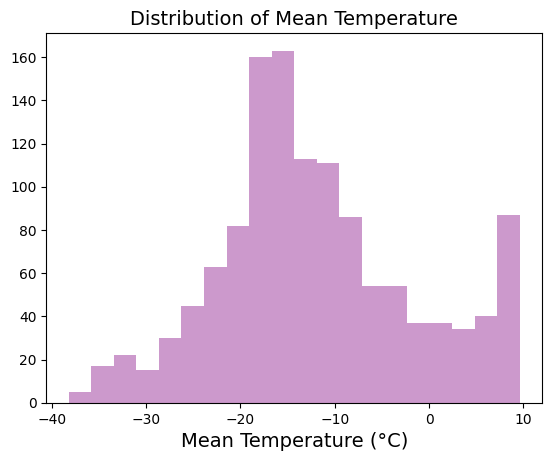

In [9]:
sns.distplot(weather_df['Tm'], color='purple', kde=False)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

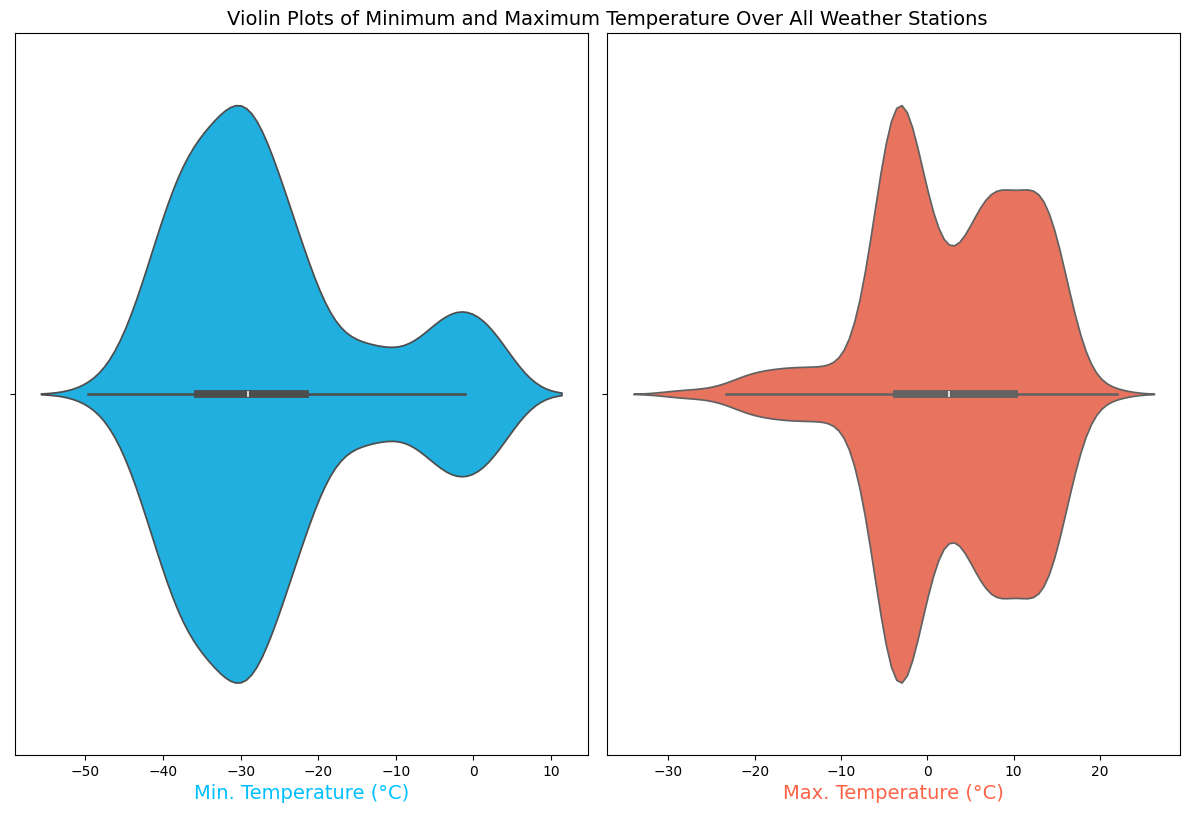

In [10]:
# Violin Plots of Minimum and Maximum Temperature
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x=weather_df["Tn"], color='deepskyblue')
plt.xlabel("Min. Temperature (°C)", fontsize=14, color='deepskyblue')
plt.subplot(1,2,2)
sns.violinplot(x=weather_df["Tx"], color='tomato')
plt.xlabel("Max. Temperature (°C)", fontsize=14, color='tomato')
plt.tight_layout()
plt.title("Violin Plots of Minimum and Maximum Temperature Over All Weather Stations", fontsize=14, x=-0.0)
plt.savefig("Violin_Plots_Min_Max_Temp.png", dpi=200)
plt.show()

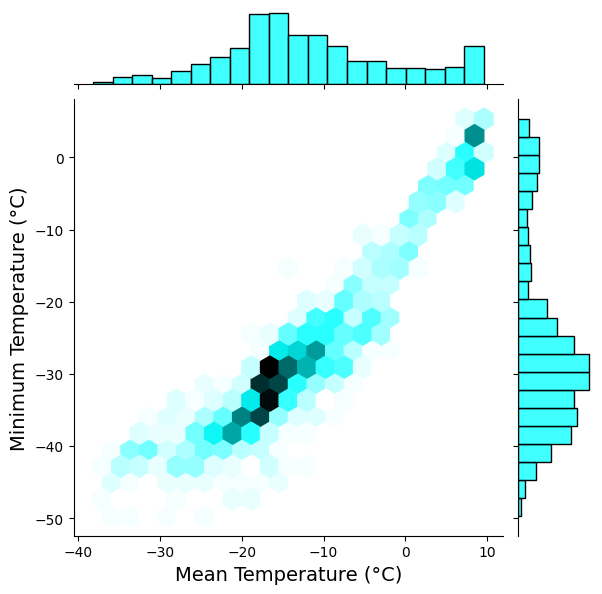

In [11]:
# Joint Plot of Mean Temperature and Minimum Temperature
g=sns.jointplot(x=weather_df['Tm'], y=weather_df['Tn'], kind='hex', color='cyan')
g.set_axis_labels("Mean Temperature (°C)","Minimum Temperature (°C)", fontsize=14)
plt.savefig("Hex_Tm_Tn.png", dpi=200)
plt.show()

### Proceed To Clustering using DBSCAN

In [13]:
# Import necessary libraries
import pandas as pd

# Define longitude and latitude boundaries
llon = -140
ulon = -50
llat = 40
ulat = 75
xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()
# Filter the DataFrame based on geographical boundaries
weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) & (weather_df['Lat'] < ulat)]


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# استفاده از ستون‌های واقعی موقعیت جغرافیایی
weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn", "Long", "Lat"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print(labels[500:560])

weather_df["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))


[ 4  4  4  4  4  4  4  4  4  3  4 -1  4 -1  4  4  4  4  4  4  4  4  4  4
  4  4 -1 -1  4 -1 -1  4 -1  3 -1  4 -1  3  3  3  3 -1  3  3  3  3  3  3
 -1 -1  3  3  3  3 -1  3  3  3  3  3]


C:\Users\NoteBook\AppData\Local\Temp\ipykernel_16068\427308404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["Clus_Db"] = labels


In [17]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

![ml162](./images/mln162.png)

## Repeat The Process One More Time Including Precipitation as Feature  

In [19]:
# stop the SettingWithCopyWarning:
pd.options.mode.chained_assignment = None

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

weather_df_copy = weather_df.copy()

# استفاده از Lat و Long به جای xm و ym
weather_df_clus_temp_P = weather_df_copy[["Tm", "Tx", "Tn", "Lat", "Long", "P"]]

# حذف ردیف‌هایی که مقادیر NaN دارند
weather_df_clus_temp_P.dropna(subset=["Tm", "Tx", "Tn", "Lat", "Long", "P"], inplace=True)

print("After Dropping Rows that contain NaN: ", weather_df_clus_temp_P.shape)
print(weather_df_clus_temp_P.head(6))


After Dropping Rows that contain NaN:  (1136, 6)
    Tm    Tx   Tn     Lat     Long      P
0  8.2  13.5  1.0  48.935 -123.742  178.8
1  7.0  15.0 -3.0  48.824 -124.133  258.6
2  6.8  16.0 -2.5  48.829 -124.052  264.6
4  7.7  14.5 -1.0  48.735 -123.728  168.4
5  8.8  13.1  1.9  48.432 -123.439   81.0
6  8.9  13.5  2.0  48.985 -123.573  110.0


In [20]:
#print (weather_df_clus_temp.shape)
weather_df_clus_temp_P_arr = weather_df_clus_temp_P[["Tm", "Tx", "Tn", "Lat", "Long", "P"]]
weather_df_clus_temp_P_arr = StandardScaler().fit_transform(weather_df_clus_temp_P_arr)

db_P = DBSCAN(eps=0.5, min_samples=10).fit(weather_df_clus_temp_P_arr)
# # create an array of zeroes of same size as db.labels_. db.labels_ is an array containing labels for 
labels_P = db_P.labels_
print(labels_P[500:560])
print (labels_P.dtype)
#print(np.isnan(labels_P).any())
weather_df_clus_temp_P["Clus_Db_"]=labels_P

[ 1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]
int64


In [21]:
weather_df_clus_temp_P.head(6)

,Tm,Tx,Tn,Lat,Long,P,Clus_Db_
0,8.2,13.5,1.0,48.935,-123.742,178.8,0
1,7.0,15.0,-3.0,48.824,-124.133,258.6,-1
2,6.8,16.0,-2.5,48.829,-124.052,264.6,-1
4,7.7,14.5,-1.0,48.735,-123.728,168.4,0
5,8.8,13.1,1.9,48.432,-123.439,81.0,0
6,8.9,13.5,2.0,48.985,-123.573,110.0,0


In [22]:
realClusterNum_P=len(set(labels_P)) - (1 if -1 in labels_P else 0)
clusterNum_P = len(set(labels_P)) 


print (set(labels_P))

{0, 1, 2, 3, 4, -1}


![ml163](./images/mln163.png)

![ml164](./images/mln164.png)

![ml165](./images/mln165.png)

## Part 1 Classification¶


We start by loading the libraries¶


In [2]:
import numpy as np 
import pandas as pd 


Read our files¶


In [4]:
train = pd.read_csv('./Titanic/train.csv')
test  = pd.read_csv('./Titanic/test.csv')
sub   = pd.read_csv('./Titanic/gender_submission.csv')


Import whole classification¶


In [5]:
from pycaret.classification import *


let's see what we're dealing with¶


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Set up our dataset (preprocessing)¶


In [10]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'])

,Description,Value
0,Session id,7566
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,2



Compare the models

In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8201,0.8606,0.7020,0.8042,0.7463,0.6086,0.6147,0.0390
gbc,Gradient Boosting Classifier,0.8171,0.8445,0.6728,0.8229,0.7342,0.5980,0.6094,0.0340
rf,Random Forest Classifier,0.8170,0.8692,0.6853,0.8087,0.7370,0.5993,0.6076,0.0590
lr,Logistic Regression,0.8091,0.8535,0.7237,0.7733,0.7444,0.5927,0.5965,0.6220
lda,Linear Discriminant Analysis,0.8042,0.8536,0.7112,0.7703,0.7373,0.5818,0.5852,0.0150
ridge,Ridge Classifier,0.8026,0.8537,0.7069,0.7689,0.7344,0.5779,0.5813,0.0180
lightgbm,Light Gradient Boosting Machine,0.8009,0.8481,0.6645,0.7866,0.7162,0.5653,0.5734,0.1640
xgboost,Extreme Gradient Boosting,0.7977,0.8358,0.6728,0.7741,0.7150,0.5603,0.5675,0.0280
nb,Naive Bayes,0.7946,0.8188,0.7362,0.7359,0.7321,0.5662,0.5699,0.0180
ada,Ada Boost Classifier,0.7945,0.8201,0.7237,0.7504,0.7310,0.5658,0.5714,0.0340


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7566, verbose=0,
                     warm_start=False)


let's create a Light GBM Model

In [12]:
lgbm  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8045,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.8571,0.9071,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.7937,0.8013,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.7097,0.8004,0.4783,0.6471,0.5500,0.3428,0.3513
4,0.8065,0.8158,0.5833,0.8750,0.7000,0.5654,0.5908
5,0.8387,0.8399,0.7917,0.7917,0.7917,0.6601,0.6601
6,0.8387,0.8969,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8387,0.9211,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.7903,0.8246,0.5833,0.8235,0.6829,0.5330,0.5507


Let's tune it!

In [13]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7991,0.6250,0.7500,0.6818,0.5132,0.5183
1,0.9048,0.9076,0.8333,0.9091,0.8696,0.7948,0.7967
2,0.7937,0.7783,0.5833,0.8235,0.6829,0.5365,0.5540
3,0.7419,0.8144,0.3478,0.8889,0.5000,0.3682,0.4418
4,0.7903,0.7610,0.5417,0.8667,0.6667,0.5253,0.5562
5,0.8226,0.8586,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.8548,0.9057,0.7083,0.8947,0.7907,0.6819,0.6928
7,0.8548,0.8838,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8065,0.9090,0.5833,0.8750,0.7000,0.5654,0.5908


Fitting 10 folds for each of 10 candidates, totalling 100 fits



Learning Curve

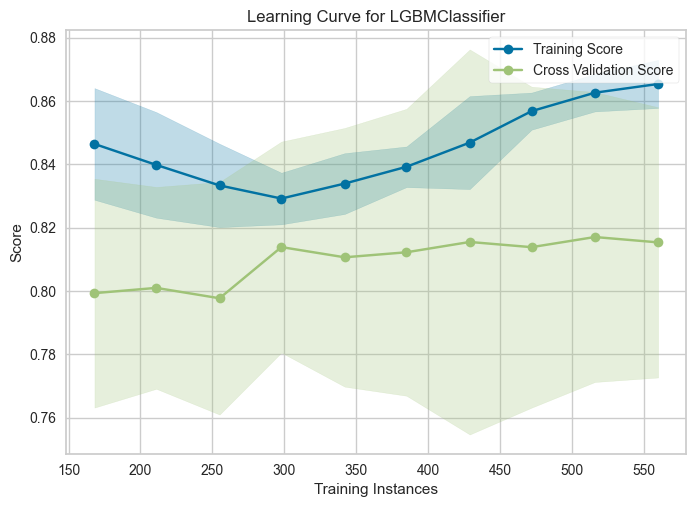

In [14]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')


AUC Curve

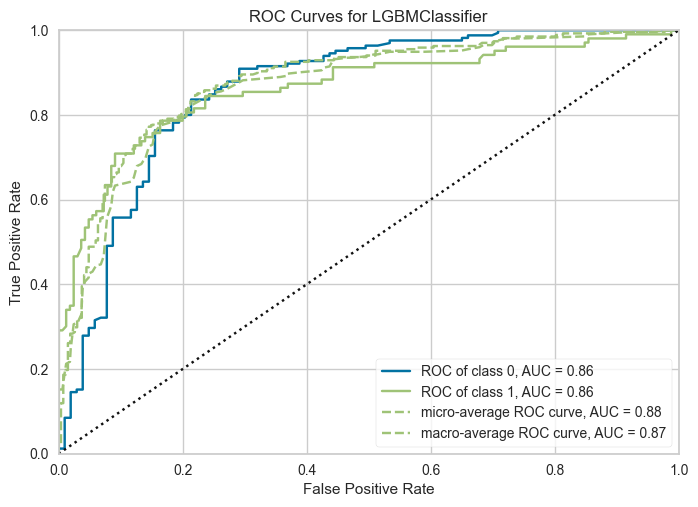

In [15]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

Confusion Matrix

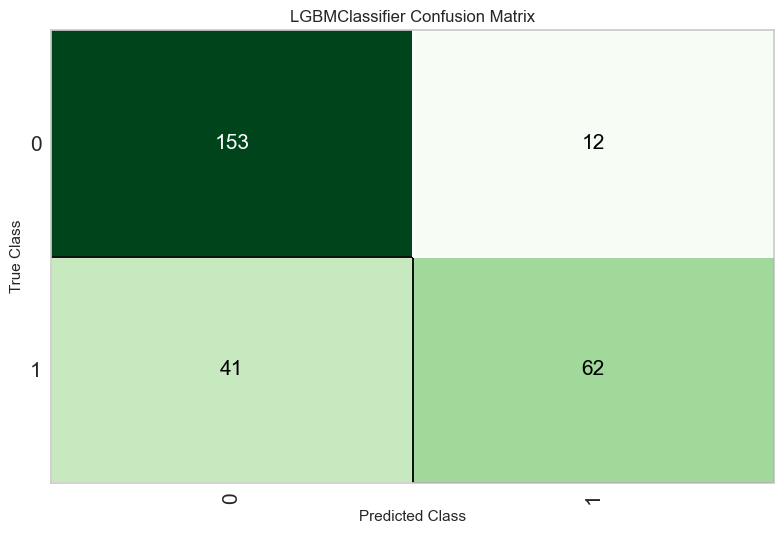

In [17]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

Feature Importance

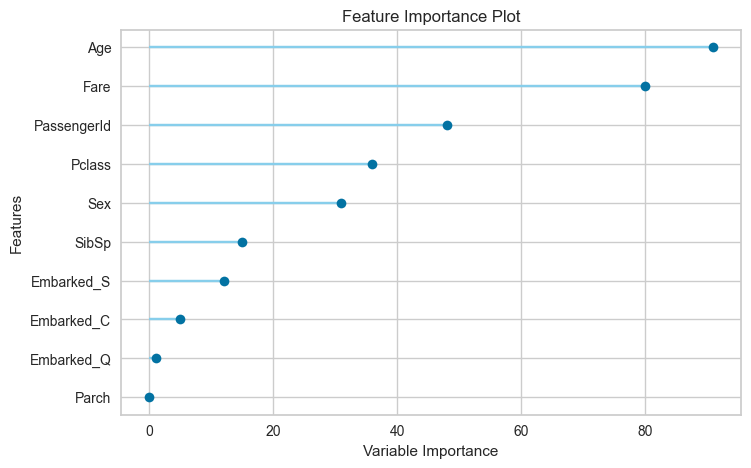

In [18]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')


whole thing!

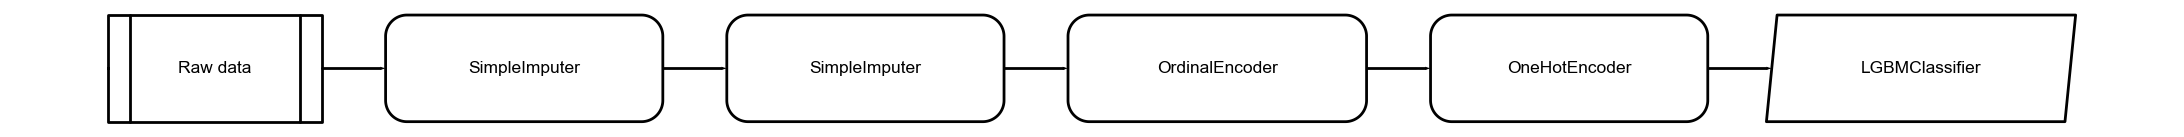

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
evaluate_model(tuned_lightgbm)

Predictions

In [20]:
predict_model(tuned_lightgbm, data=test)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.9015
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.5225
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.9486
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.8480
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,0,0.6386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.9135
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.9516
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.9237
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.9135


In [21]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9015
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5225
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9486
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8480
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.6386


## Part2 - Regression


Import Whole Regression

In [24]:
from pycaret.regression import *


let's see the data

In [26]:
train = pd.read_csv('./House Price/train.csv')
test  = pd.read_csv('./House Price/test.csv')
sample= pd.read_csv('./House Price/sample_submission.csv')

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Set up our dataset (preprocessing)

In [30]:
reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True)

,Description,Value
0,Session id,6126
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 253)"
5,Transformed train set shape,"(1021, 253)"
6,Transformed test set shape,"(439, 253)"
7,Ignore features,6
8,Numeric features,37
9,Categorical features,37


let's compare different regression models!

In [31]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17242.8782,920763419.8625,29189.0699,0.8484,0.1420,0.1006,0.2570
lightgbm,Light Gradient Boosting Machine,17768.3846,1040818154.7815,31186.7300,0.8260,0.1448,0.1019,0.4770
rf,Random Forest Regressor,18854.8089,1135511419.9530,32697.6836,0.8112,0.1558,0.1109,0.3820
xgboost,Extreme Gradient Boosting,18819.4151,1292538611.0664,33733.5977,0.7856,0.1544,0.1097,0.2730
et,Extra Trees Regressor,19525.1108,1310003036.4058,34784.2159,0.7817,0.1582,0.1128,0.3810
en,Elastic Net,18123.7760,1262363749.1699,33382.7365,0.7771,0.1469,0.1033,0.1800
par,Passive Aggressive Regressor,18952.9614,1317774149.5603,33798.5529,0.7687,0.1930,0.1132,0.1970
huber,Huber Regressor,18731.2629,1352205984.6273,33622.2190,0.7572,0.2091,0.1125,0.2410
ada,AdaBoost Regressor,24559.9821,1492450532.8790,37729.3772,0.7523,0.2032,0.1590,0.2410
br,Bayesian Ridge,18579.1939,1368957595.9938,34174.5144,0.7502,0.1701,0.1091,0.1670


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=6126, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

let's do LGBM

In [32]:
lgb = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21259.6650,1761004634.8668,41964.3257,0.6707,0.1578,0.1090
1,18178.3381,772877868.5973,27800.6811,0.8616,0.1456,0.1068
2,20235.7524,1038812116.7006,32230.6084,0.8843,0.1744,0.1231
3,21353.2355,1840984405.9658,42906.6942,0.8331,0.1333,0.0951
4,18283.7762,1306817133.6186,36149.9258,0.8271,0.1464,0.1008
5,15633.1621,563093295.8250,23729.5869,0.8987,0.1405,0.0964
6,14501.3270,382244698.2066,19551.0792,0.9302,0.1477,0.1024
7,17840.3804,1628532717.4842,40355.0829,0.6088,0.1744,0.1157
8,13434.8160,525776669.8697,22929.8205,0.8829,0.1131,0.0792


gotta tune it

In [33]:
tuned_lgb = tune_model(lgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20796.4345,1300903376.2517,36068.0382,0.7567,0.1539,0.1106
1,21005.4168,789635881.4954,28100.4605,0.8586,0.1723,0.1354
2,20370.0852,1212482821.4746,34820.7240,0.8650,0.1722,0.1208
3,25129.4165,2563161915.3031,50627.6793,0.7676,0.1663,0.1186
4,20074.7210,1836578424.2221,42855.3197,0.7571,0.1701,0.1140
5,19408.2454,734315805.9567,27098.2620,0.8679,0.1626,0.1203
6,17898.0394,563684344.0776,23742.0375,0.8971,0.1799,0.1285
7,19907.2811,1391781570.7135,37306.5888,0.6657,0.1889,0.1333
8,13615.9719,354393542.9944,18825.3431,0.9211,0.1087,0.0852


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
predictions = predict_model(tuned_lgb, data = test)
sample['SalePrice'] = predictions['prediction_label']
sample.to_csv('submission_house_price.csv',index=False)
sample.head()

,Id,SalePrice
0,1461,125478.028732
1,1462,165423.441259
2,1463,178691.738615
3,1464,186925.680172
4,1465,185365.113368
